In [920]:
#IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [921]:
#READING CSV FILE
data = pd.read_csv(r"D:\Siddharth Upgrad\Case Study\8. Housing market\train.csv")

In [922]:
#CHECKING DATA ON FILE
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [923]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [924]:
#PERFORMING EDA
# 1. TAKING RELEVANT DECISIONS ON NA VALUES IN DIFFERENT FIELDS

In [925]:
#data.LotFrontage

data.LotFrontage.unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.])

D:\Siddharth_Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


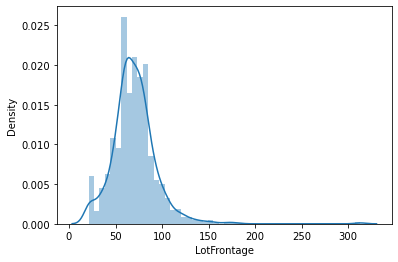

In [926]:
sns.distplot(data.LotFrontage,kde=True)
plt.show()

In [927]:
print("LotFrontage Mean = " , data.LotFrontage.mean())
print("LotFrontage Median = " , data.LotFrontage.median())

LotFrontage Mean =  70.04995836802665
LotFrontage Median =  69.0


In [928]:
# Mean and Median values seem close enough indicating non presence of outliers
# Replacing nAn values in data.LotFrontage with mean value of 70
data.LotFrontage = data.LotFrontage.fillna(70)

In [929]:
# 2. data.Alley

In [930]:
data.Alley.unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [931]:
# Replacing nAn values in data.Alley with keyword "No Access"
data.Alley = data.Alley.fillna('No_Access')

In [932]:
# 3. data.MasVnrType

In [933]:
data.MasVnrType.unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [934]:
data.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [935]:
#Fill nan values for MasVnrType with "None"
data.MasVnrType = data.MasVnrType.fillna('None')

In [936]:
# 4. data.MasVnrArea

In [937]:
print("MasVnrArea Mean = " , data.MasVnrArea.mean())
print("MasVnrArea Median = " , data.MasVnrArea.median())

MasVnrArea Mean =  103.68526170798899
MasVnrArea Median =  0.0


D:\Siddharth_Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MasVnrArea'>

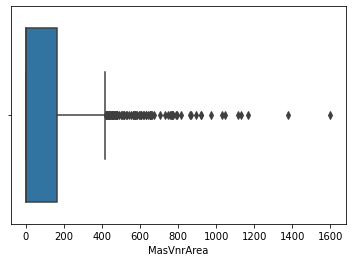

In [938]:
sns.boxplot(data.MasVnrArea)

In [939]:
# MasVnrArea has too many outliers also as per definition it has direct corelation with the size of the house
# So dropping this columns
data = data.drop(columns = 'MasVnrArea')

In [940]:
# 5. data.BsmtQual

In [941]:
data.BsmtQual.value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [942]:
#data.BsmtQual - Replacing nAn values with "NA"
data.BsmtQual = data.BsmtQual.fillna('NA')

In [943]:
# 6. data.BsmtCond

In [944]:
data.BsmtCond.unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [945]:
#data.BsmtCond - Replacing nAn values with "NA"
data.BsmtCond = data.BsmtCond.fillna('NA')

In [946]:
# 7. data.BsmtCond

In [947]:
data.BsmtExposure.unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [948]:
#data.BsmtExposure - Replacing nAn values with "NA"
data.BsmtExposure = data.BsmtExposure.fillna('NA')

In [949]:
# 8. data.BsmtFinType1
# 9. data.BsmtFinType2

In [950]:
#data.BsmtFinType1 and data.BsmtFinType2 - Replacing nAn values with "NA"
data.BsmtFinType1 = data.BsmtFinType1.fillna('NA')
data.BsmtFinType2 = data.BsmtFinType2.fillna('NA')

In [951]:
#10. data.Electrical

In [952]:
data.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [953]:
#data.Electrical - Replacing nAn values with "Sbrkr"
data.Electrical = data.Electrical.fillna('Sbrkr')

In [954]:
#11. data.FireplaceQu

In [955]:
data[data.Fireplaces==0]['FireplaceQu'].unique()

array([nan], dtype=object)

In [956]:
#Observation : Wherever data.Fireplaces==0 the data under FireplaceQu is nAn. 
# So replacing nAn values under data.FireplaceQu with 'NA'
data.FireplaceQu = data.FireplaceQu.fillna('NA')

In [957]:
#12. data.GarageType
#13. data.GarageYrBlt
#14. data.GarageFinish
#15. data.GarageQual
#16. data.GarageCond

In [958]:
data[data.GarageType.isna()]['GarageCond'].unique()

array([nan], dtype=object)

In [959]:
data[data.GarageType.isna()]['GarageQual'].unique()

array([nan], dtype=object)

In [960]:
data[data.GarageType.isna()]['GarageFinish'].unique()

array([nan], dtype=object)

In [961]:
data[data.GarageType.isna()]['GarageYrBlt'].unique()

array([nan])

In [962]:
#Observation Wherever data.GarageType is NaN for such cases data.GarageYrBlt , data.GarageFinish, data.GarageQual , data.GarageCond
#are also NaN indicating there is no garage present in that particular house. So for all these cases replacing NaN values with 'NA'
data.GarageType = data.GarageType.fillna('NA')
data.GarageYrBlt = data.GarageYrBlt.fillna('NA')
data.GarageFinish = data.GarageFinish.fillna('NA')
data.GarageQual = data.GarageQual.fillna('NA')
data.GarageCond = data.GarageCond.fillna('NA')

In [963]:
#Assuming that garage is built either along with the house (Year mathcing with YrBuilt column) or with modification(Year matching with Remodelling year column)
# Also presence of "NA" in this field may impede our analysis taking a decision to drop this column
data = data.drop(columns = 'GarageYrBlt')

In [964]:
#17. data.PoolQC

In [965]:
data.PoolQC.value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [966]:
#Replacing data.PoolQC NaN values with 'NA'
data.PoolQC = data.PoolQC.fillna('NA')

In [967]:
#18. data.Fence

In [968]:
data.Fence.value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [969]:
#Replacing data.Fence NaN values with 'NA'
data.Fence = data.Fence.fillna('NA')

In [970]:
#19. data.MiscFeature

In [971]:
data.MiscFeature.unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [972]:
#Replacing data.MiscFeature NaN values with 'NA'
data.MiscFeature = data.MiscFeature.fillna('NA')

In [973]:
#Checking if all na values are targetted and taken care of ; 0 sum indicates there is no NaN value present
data[data.isna()].sum().sum()

0.0

In [974]:
#Checking which coloumns have constant values throughout which then can be removed directly.
templist = []
for i in data.columns:
    array = data[i].unique()
    arraylen = len(array)
    if arraylen == 1:
        templist.append(i)

print(templist)

#Conclusion :  if templist is found blank then There are no coloums having constant values throughout

[]


In [975]:
#Dropping unwanted columns
#ID is not required since it will not be useful in the model
data = data.drop(columns = 'Id')

In [976]:
#For 3 coloums containing years data, forming a derieved metrics which will be (present year) minus (year in column)
# which will give a feel of how old the property is or how old did the recent activity happen
# then we will treat these derieved columns as ordinal data
from datetime import date
todays_date = date.today()
yr = int(todays_date.year)
data['BuildingAge'] = yr - data['YearBuilt']

data['RemodelingAge'] = yr - data['YearRemodAdd']

data['YrSoldAge'] = yr - data['YrSold']
data = data.drop(columns = ['YearBuilt','YearRemodAdd','YrSold'])

In [977]:
#Creating Dummy Variables for all the categorical data
#MSSubClass has numeric data which is categoric in nature
dummyframe = pd.get_dummies(data = data.MSSubClass , prefix = 'MSSubClass', prefix_sep = '_',drop_first = 'True')
data = pd.concat([data,dummyframe],axis = 1)
data=data.drop(columns = 'MSSubClass')

In [978]:
#Creating Dummy variables for all categorical variables with dtype as object
for i in data.columns:
    if data[i].dtype == 'O':
        dummyframe = pd.get_dummies(data = data[i] , prefix = i, prefix_sep = '_',drop_first = 'True')
        data = pd.concat([data,dummyframe],axis = 1)

In [979]:
#Dropping the columns whose dummy variables are created
for i in data.columns:
    if data[i].dtype == 'O':
        data=data.drop(columns = i)

In [980]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 272 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(1), int64(33), uint8(238)
memory usage: 727.3 KB


In [981]:
#PERFORMING TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
#y = data.pop('SalePrice')
#X = data
data_train,data_test= train_test_split(data,train_size = 0.7 , random_state = 5)

In [982]:
#SCALING THE NUMERIC NON-CATEGORICAL FIELDS
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [983]:
#Performing Fit_Transform on training set
data_train[['LotFrontage','LotArea','OverallQual','OverallCond','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','BuildingAge','RemodelingAge','YrSoldAge','SalePrice']] = scaler.fit_transform(data_train[['LotFrontage','LotArea','OverallQual','OverallCond','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','BuildingAge','RemodelingAge','YrSoldAge','SalePrice']])
y_train = data_train.pop('SalePrice')
X_train = data_train

In [984]:
#Performing Transform on test set
data_test[['LotFrontage','LotArea','OverallQual','OverallCond','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','BuildingAge','RemodelingAge','YrSoldAge','SalePrice']] = scaler.transform(data_test[['LotFrontage','LotArea','OverallQual','OverallCond','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','BuildingAge','RemodelingAge','YrSoldAge','SalePrice']])
y_test = data_test.pop('SalePrice')
X_test = data_test

In [985]:
#RIDGE REGRESSION
#CHECKING RESULTS FOR DIFFERENT LAMBDA VALUES

from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

lambdas = [0, 0.001, 0.01,0.02,0.03,0.04,0.05,0.06, 0.1, 1, 10,20,30,40,50,60,70,80,90,100, 1000] 
for i in lambdas:
    ridgereg = Ridge(alpha = i)
    ridgereg.fit(X_train, y_train)
    #Computing the r2 score
    y_train_pred = ridgereg.predict(X_train)
    print("Train r2 score for alpha value " + str(i) + " = " + str(r2_score(y_train, y_train_pred))) 
    y_test_pred = ridgereg.predict(X_test)
    print("Test r2 score for alpha value " + str(i) + " = " + str(r2_score(y_test, y_test_pred))) 

Train r2 score for alpha value 0 = 0.9484198679509414
Test r2 score for alpha value 0 = -5.26534826992971e+25
Train r2 score for alpha value 0.001 = 0.9482230406215504
Test r2 score for alpha value 0.001 = 0.781848211627943
Train r2 score for alpha value 0.01 = 0.9467026438396517
Test r2 score for alpha value 0.01 = 0.8223394185529405
Train r2 score for alpha value 0.02 = 0.9451239089628619
Test r2 score for alpha value 0.02 = 0.8247138868421001
Train r2 score for alpha value 0.03 = 0.9436267223613428
Test r2 score for alpha value 0.03 = 0.8250618663341869
Train r2 score for alpha value 0.04 = 0.9423015776550301
Test r2 score for alpha value 0.04 = 0.8248519889326156
Train r2 score for alpha value 0.05 = 0.941145817401501
Test r2 score for alpha value 0.05 = 0.8244744820993816
Train r2 score for alpha value 0.06 = 0.9401358566820938
Test r2 score for alpha value 0.06 = 0.8240643880785239
Train r2 score for alpha value 0.1 = 0.9371116950735099
Test r2 score for alpha value 0.1 = 0.82271

In [986]:
#Selecting lambda coeffecient as 0.03 Rebuilding model since it has the best r2 score in test data as well as best r2 score in train data

In [987]:
#REBUILDING REGRESSION MODEL WITH ALPHA AS 0.03

ridgereg1 = Ridge(alpha = 0.03)
ridgereg1.fit(X_train, y_train)

#Computing the r2 score
y_train_pred = ridgereg1.predict(X_train)
print("Train r2 score for alpha value " + str(0.02) + " = " + str(r2_score(y_train, y_train_pred))) 

y_test_pred = ridgereg1.predict(X_test)
print("Test r2 score for alpha value " + str(0.02) + " = " + str(r2_score(y_test, y_test_pred)))

Train r2 score for alpha value 0.02 = 0.9436267223613428
Test r2 score for alpha value 0.02 = 0.8250618663341869


In [988]:
#COMPUTING THE TOP GUIDING FEATURES
ridgecoeff = pd.DataFrame()
ridgecoeff['features'] = X_train.columns
ridgecoeff['coeffecient'] = ridgereg1.coef_
ridgecoeff['abscoeff'] = abs(ridgereg1.coef_)
ridgecoeff = ridgecoeff.sort_values(by='abscoeff',ascending=False)
ridgecoeff.head(10)

,features,coeffecient,abscoeff
123,RoofMatl_Membran,0.559590,0.559590
128,RoofMatl_WdShngl,0.526448,0.526448
124,RoofMatl_Metal,0.506046,0.506046
122,RoofMatl_CompShg,0.480649,0.480649
127,RoofMatl_WdShake,0.469102,0.469102
27,PoolArea,0.464712,0.464712
125,RoofMatl_Roll,0.454661,0.454661
126,RoofMatl_Tar&Grv,0.449930,0.449930
248,PoolQC_Gd,-0.329532,0.329532
247,PoolQC_Fa,-0.269877,0.269877


In [989]:
#LASSO REGRESSION
#CHECKING RESULTS FOR DIFFERENT LAMBDA VALUES

from sklearn.linear_model import Lasso

lambdas = [0,0.0001,0.00001,0.00002,0.000001, 0.001, 0.01,0.02,0.03,0.04,0.05, 0.1, 1, 10,20,30,40,50,60,70,80,90,100, 1000] 
for i in lambdas:
    lassoreg = Lasso(alpha = i)
    lassoreg.fit(X_train, y_train)
    #Computing the r2 score
    y_train_pred_lasso = lassoreg.predict(X_train)
    print("Train r2 score for alpha value " + str(i) + " = " + str(r2_score(y_train, y_train_pred_lasso))) 
    y_test_pred_lasso = lassoreg.predict(X_test)
    print("Test r2 score for alpha value " + str(i) + " = " + str(r2_score(y_test, y_test_pred_lasso))) 

C:\Users\Akhilesh Choudhari\AppData\Local\Temp\ipykernel_16076\3432372484.py:9: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lassoreg.fit(X_train, y_train)
D:\Siddharth_Python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
D:\Siddharth_Python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.475e-01, tolerance: 1.334e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(

Train r2 score for alpha value 0 = 0.9478942995439391
Test r2 score for alpha value 0 = 0.7876204154936381
Train r2 score for alpha value 0.0001 = 0.9124423924165658
Test r2 score for alpha value 0.0001 = 0.8285930683556282


D:\Siddharth_Python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.367e-03, tolerance: 1.334e-03
  model = cd_fast.enet_coordinate_descent(
D:\Siddharth_Python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.773e-03, tolerance: 1.334e-03
  model = cd_fast.enet_coordinate_descent(


Train r2 score for alpha value 1e-05 = 0.9434445807145405
Test r2 score for alpha value 1e-05 = 0.831486924552079
Train r2 score for alpha value 2e-05 = 0.9373047055641524
Test r2 score for alpha value 2e-05 = 0.8310286622875408


D:\Siddharth_Python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.760e-01, tolerance: 1.334e-03
  model = cd_fast.enet_coordinate_descent(


Train r2 score for alpha value 1e-06 = 0.9477331886612639
Test r2 score for alpha value 1e-06 = 0.8025465425154522
Train r2 score for alpha value 0.001 = 0.8329678723330138
Test r2 score for alpha value 0.001 = 0.7997568628442473
Train r2 score for alpha value 0.01 = 0.468354863750183
Test r2 score for alpha value 0.01 = 0.4807811950384868
Train r2 score for alpha value 0.02 = 0.2660478837950421
Test r2 score for alpha value 0.02 = 0.2806130108598256
Train r2 score for alpha value 0.03 = 0.048283114646830994
Test r2 score for alpha value 0.03 = 0.05273083226842623
Train r2 score for alpha value 0.04 = 0.0
Test r2 score for alpha value 0.04 = -0.0009716501146774803
Train r2 score for alpha value 0.05 = 0.0
Test r2 score for alpha value 0.05 = -0.0009716501146774803
Train r2 score for alpha value 0.1 = 0.0
Test r2 score for alpha value 0.1 = -0.0009716501146774803
Train r2 score for alpha value 1 = 0.0
Test r2 score for alpha value 1 = -0.0009716501146774803
Train r2 score for alpha valu

In [990]:
#Selecting lambda coeffecient as 0.00001 Rebuilding model since it has the best r2 score in test data as well as best r2 score in train data

In [991]:
lassoreg1 = Lasso(alpha = 0.00001)
lassoreg1.fit(X_train, y_train)

#Computing the r2 score
y_train_pred_lasso = lassoreg1.predict(X_train)
print("Train r2 score for alpha value " + str(0.00001) + " = " + str(r2_score(y_train, y_train_pred_lasso))) 

y_test_pred_lasso = lassoreg1.predict(X_test)
print("Test r2 score for alpha value " + str(0.00001) + " = " + str(r2_score(y_test, y_test_pred_lasso)))

Train r2 score for alpha value 1e-05 = 0.9434445807145405
Test r2 score for alpha value 1e-05 = 0.831486924552079


D:\Siddharth_Python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.367e-03, tolerance: 1.334e-03
  model = cd_fast.enet_coordinate_descent(


In [992]:
#COMPUTING THE TOP GUIDING FEATURES
lassocoef = pd.DataFrame()
lassocoef['features'] = X_train.columns
lassocoef['coeffecient'] = lassoreg1.coef_
lassocoef['abscoeff'] = abs(lassoreg1.coef_)
lassocoef = lassocoef.sort_values(by='abscoeff',ascending=False)
lassocoef.head(10)

,features,coeffecient,abscoeff
123,RoofMatl_Membran,0.739564,0.739564
128,RoofMatl_WdShngl,0.713939,0.713939
124,RoofMatl_Metal,0.690531,0.690531
122,RoofMatl_CompShg,0.646793,0.646793
127,RoofMatl_WdShake,0.646268,0.646268
125,RoofMatl_Roll,0.632316,0.632316
126,RoofMatl_Tar&Grv,0.625799,0.625799
27,PoolArea,0.242491,0.242491
248,PoolQC_Gd,-0.241040,0.241040
247,PoolQC_Fa,-0.213593,0.213593
